# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [35]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\themi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API")

In [37]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [38]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

Total articles about Bitcoin: 9530


In [39]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

Total articles about Ethereum: 4471


In [40]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
btc_df = btc_df[cols]

btc_df.head()

,date,compound,positive,negative,neutral,text
0,2022-06-03,-0.5574,0.000,0.098,0.902,New York lawmakers have passed a bill\r\n that...
1,2022-05-10,0.0772,0.036,0.000,0.964,"Now, even though there are a number of women-f..."
2,2022-06-02,-0.1027,0.000,0.040,0.960,You can now reportedly pay for your burritos a...
3,2022-05-09,0.3400,0.072,0.000,0.928,"Image source, Getty Images\r\nThe value of Bit..."
4,2022-05-16,0.3818,0.114,0.052,0.833,"As a kid, I remember when my father tried to u..."


In [41]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
eth_df = eth_df[cols]

eth_df.head()

,date,compound,positive,negative,neutral,text
0,2022-05-10,0.6486,0.135,0.000,0.865,Meta has revealed more of how NFTs will work o...
1,2022-05-23,-0.1027,0.000,0.040,0.960,GameStop has officially thrown itself headlong...
2,2022-05-23,0.1280,0.046,0.000,0.954,GameStop is going all-in on crypto. The video ...
3,2022-06-03,-0.5574,0.000,0.098,0.902,New York lawmakers have passed a bill\r\n that...
4,2022-05-25,0.0258,0.034,0.000,0.966,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu..."


In [42]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.137645,0.053550,0.080650,0.865900
std,0.407909,0.061439,0.075464,0.101294
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.411525,0.000000,0.040000,0.850750
50%,-0.284600,0.041500,0.071500,0.888500
75%,0.156025,0.077500,0.099250,0.924250
max,0.750600,0.202000,0.300000,0.964000


In [43]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.063900,0.043400,0.050550,0.906200
std,0.412051,0.054028,0.052319,0.055141
min,-0.690800,0.000000,0.000000,0.803000
25%,-0.381800,0.000000,0.000000,0.863500
50%,-0.127900,0.017000,0.045000,0.923000
75%,0.181000,0.072750,0.079000,0.954250
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin at .053 while ETH was lower at .043

Q: Which coin had the highest compound score?

A: Bitcoin at max .75 versus ETH lower at max .69

Q. Which coin had the highest positive score?

A: Ethereum at 1.0 vs BTC lower at .96

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [45]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [46]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    # Create a tokenized list of the words
    # Lemmatize words into root words
    # Convert the words to lowercase
    # Remove the stop words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [47]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df["tokens"] = btc_df["text"].apply(tokenizer)
btc_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2022-06-03,-0.5574,0.000,0.098,0.902,New York lawmakers have passed a bill\r\n that...,"[new, york, lawmaker, passed, bill, would, tem..."
1,2022-05-10,0.0772,0.036,0.000,0.964,"Now, even though there are a number of women-f...","[even, though, number, womenfocused, crypto, s..."
2,2022-06-02,-0.1027,0.000,0.040,0.960,You can now reportedly pay for your burritos a...,"[reportedly, pay, burrito, taco, bitcoin, digi..."
3,2022-05-09,0.3400,0.072,0.000,0.928,"Image source, Getty Images\r\nThe value of Bit...","[image, source, getty, imagesthe, value, bitco..."
4,2022-05-16,0.3818,0.114,0.052,0.833,"As a kid, I remember when my father tried to u...","[kid, remember, father, tried, use, broom, han..."


In [48]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df["tokens"] = eth_df["text"].apply(tokenizer)
eth_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2022-05-10,0.6486,0.135,0.000,0.865,Meta has revealed more of how NFTs will work o...,"[meta, ha, revealed, nfts, work, instagram, us..."
1,2022-05-23,-0.1027,0.000,0.040,0.960,GameStop has officially thrown itself headlong...,"[gamestop, ha, officially, thrown, headlong, w..."
2,2022-05-23,0.1280,0.046,0.000,0.954,GameStop is going all-in on crypto. The video ...,"[gamestop, going, allin, crypto, video, game, ..."
3,2022-06-03,-0.5574,0.000,0.098,0.902,New York lawmakers have passed a bill\r\n that...,"[new, york, lawmaker, passed, bill, would, tem..."
4,2022-05-25,0.0258,0.034,0.000,0.966,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...","[davos, switzerland, may, reuters, ethereums, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [75]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_tokens = tokenizer(btc_df["text"].str.cat()) #convert to string to prevent error
btc_counts = Counter(ngrams(btc_tokens, n=2))
btc_counts

Counter({('new', 'york'): 1,
         ('york', 'lawmaker'): 1,
         ('lawmaker', 'passed'): 1,
         ('passed', 'bill'): 1,
         ('bill', 'would'): 1,
         ('would', 'temporarily'): 1,
         ('temporarily', 'ban'): 1,
         ('ban', 'new'): 1,
         ('new', 'bitcoin'): 1,
         ('bitcoin', 'mining'): 1,
         ('mining', 'operation'): 1,
         ('operation', 'early'): 1,
         ('early', 'friday'): 1,
         ('friday', 'state'): 1,
         ('state', 'senator'): 1,
         ('senator', 'voted'): 1,
         ('voted', 'pas'): 1,
         ('pas', 'legislation'): 1,
         ('legislation', 'bound'): 1,
         ('bound', 'desk'): 1,
         ('desk', 'charsnow'): 1,
         ('charsnow', 'even'): 1,
         ('even', 'though'): 1,
         ('though', 'number'): 1,
         ('number', 'womenfocused'): 1,
         ('womenfocused', 'crypto'): 1,
         ('crypto', 'space'): 1,
         ('space', 'odeniran'): 1,
         ('odeniran', 'say'): 1,
         ('s

In [76]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_tokens = tokenizer(eth_df["text"].str.cat()) #convert to string to prevent error
eth_counts = Counter(ngrams(eth_tokens, n=2))
eth_counts

Counter({('meta', 'ha'): 1,
         ('ha', 'revealed'): 1,
         ('revealed', 'nfts'): 1,
         ('nfts', 'work'): 1,
         ('work', 'instagram'): 1,
         ('instagram', 'usbased'): 1,
         ('usbased', 'test'): 1,
         ('test', 'show'): 1,
         ('show', 'youve'): 1,
         ('youve', 'bought'): 1,
         ('bought', 'created'): 1,
         ('created', 'free'): 1,
         ('free', 'connecting'): 1,
         ('connecting', 'instagram'): 1,
         ('instagram', 'account'): 1,
         ('account', 'compatible'): 1,
         ('compatible', 'digital'): 1,
         ('digital', 'walle'): 1,
         ('walle', 'charsgamestop'): 1,
         ('charsgamestop', 'ha'): 1,
         ('ha', 'officially'): 1,
         ('officially', 'thrown'): 1,
         ('thrown', 'headlong'): 1,
         ('headlong', 'web'): 1,
         ('web', 'viper'): 1,
         ('viper', 'nest'): 1,
         ('nest', 'new'): 1,
         ('new', 'app'): 1,
         ('app', 'release'): 1,
         ('re

In [52]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [79]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
top10_btc = token_count(btc_tokens, 10)
top10_btc

[('bitcoin', 9),
 ('new', 8),
 ('cryptocurrency', 8),
 ('world', 6),
 ('week', 6),
 ('reuters', 5),
 ('stolen', 4),
 ('blockchain', 4),
 ('biggest', 4),
 ('charsmay', 4)]

In [80]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
top10_eth = token_count(eth_tokens, 10)
top10_eth

[('cryptocurrency', 11),
 ('bitcoin', 7),
 ('ha', 6),
 ('world', 5),
 ('digital', 4),
 ('ethereum', 4),
 ('reuters', 4),
 ('market', 4),
 ('char', 4),
 ('year', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

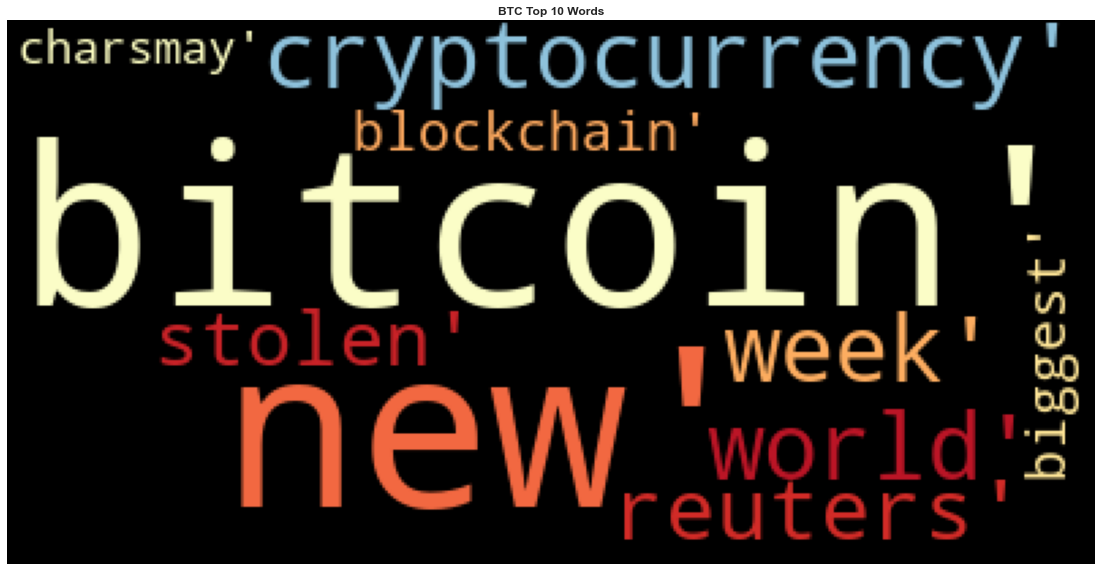

In [90]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_list = str(top10_btc)
wordcloud = WordCloud(colormap="RdYlBu").generate(btc_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 12, "fontweight": "bold"}
plt.title("BTC Top 10 Words", fontdict=fontdict)
plt.show()

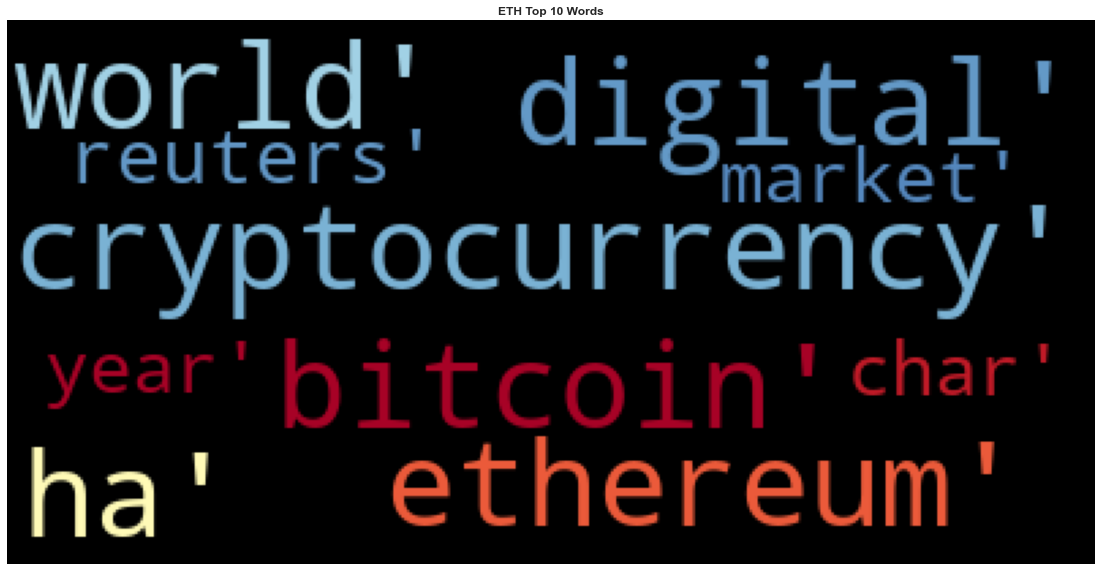

In [91]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_list = str(top10_eth)
wordcloud = WordCloud(colormap="RdYlBu").generate(eth_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 12, "fontweight": "bold"}
plt.title("ETH Top 10 Words", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [58]:
import spacy
from spacy import displacy

In [59]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [60]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [93]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_ner_text = ' '.join(btc_df['text'])
btc_ner_text

"New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars] Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars] You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don't mind spending your coins directly instead of going through exchanges first. Flexa h… [+1428 chars] Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to the Coinbase cryptocurrency exchange.\r\nThe world's largest cryp… [+2164 chars] As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from t

In [95]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(btc_ner_text)
# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data["title"] = "Bitcoin - Named Entity Recognition"

In [96]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [101]:
# List all Entities
# YOUR CODE HERE!
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

New York GPE
Friday DATE
36-27 CARDINAL
Odeniran GPE
first ORDINAL
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
+2164 NORP
nearly three feet QUANTITY
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 PERSON
May 24 DATE
Reuters ORG
its ninth week DATE
May 10 DATE
Reuters ORG
Seth Green's PERSON
NFT ORG
two CARDINAL
Seth Gr

---

### Ethereum NER

In [94]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_ner_text = ' '.join(eth_df['text'])
eth_ner_text

'Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars] GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars] GameStop is going all-in on crypto. The video game retailer launched\xa0its own self-custodial Ethereum digital wallet, it said Monday. The wallet will be accessible through a Google Chrome extension an… [+1491 chars] New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It\'s now bound for the desk of… [+2036 chars] DAVOS, Switzerland, May 25 (Reuters) - Ethereum\'s co-founder Gavin Wood said cryptocurrency investors need to be more aware of wh

In [98]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(eth_ner_text)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum - Named Entity Recognition"

In [100]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [102]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Meta ORG
Instagram ORG
US GPE
Instagram ORG
web3 LOC
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
New York GPE
Friday DATE
36-27 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
9 CARDINAL
8 CARDINAL
Nvidia ORG
LHR ORG
last year  DATE
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
the past few years DATE
NFT ORG
$29 billion MONEY
several years ago DATE
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
+2164 NORP
Solana PERSON
third ORDINAL
10% PERCENT
Wednesday DATE

---